# Fast Fourier Transform (FFT)

Fast Fourier Transform (FFT) is used to determine the field at a distance far away from the mask,

$$z\gg\frac{\pi}{\lambda}\left(\xi^{2}+\eta^{2}\right)_{\max},$$

where $\xi$ and $\eta$ are the locations of the mask. The field can be computed using the following integral (in 2D):


$$E(x,y,z)=\frac{e^{ik(z+\frac{x^{2}+y^{2}}{2z})}}{i\lambda z}\iint E_{0}(\xi,\eta)e^{-i\frac{k}{z}(x\xi+y\eta)}d\xi d\eta,$$

which can be computed as a FFT:

$$E(x,y,z)=\frac{e^{ik(z+\frac{x^{2}+y^{2}}{2z})}}{i\lambda z}TF\left[E_{0}(\xi,\eta)\right].$$

In [43]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

## X Scheme

In [44]:
x0 = np.linspace(-50 * um, 50 * um, 1024 * 32)
wavelength = .5 * um

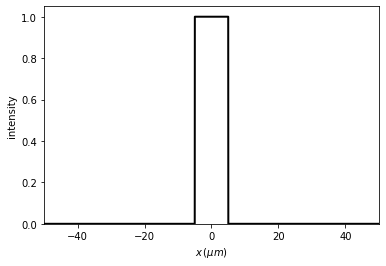

In [45]:
# plane wave
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0)

# slit
t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=10 * um)
t0.draw()

u1 = u0 * t0

(0.0, 11268784.8)

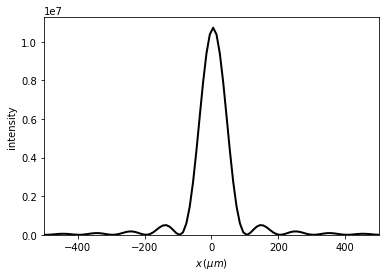

In [47]:
u2 = u1.fft(z=2 * mm, remove0=False, new_field=True)
u2.draw(kind='intensity', logarithm=False, normalize=True)
plt.xlim(-500, 500)
plt.ylim(bottom=0)


(0.0, 3439.8)

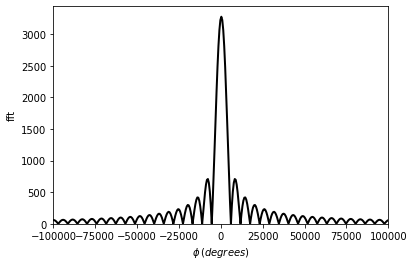

In [49]:
u3 = u1.fft(z=2 * mm, remove0=False, new_field=True)
u3.draw(kind='fft', logarithm=False, normalize=True)
plt.xlim(-1e5, 1e5)
plt.ylim(bottom=0)


### Fast Fourier Transform using Rayleigh-Sommerfeld (near field) and a lens

determining the field at the Fourier plane of the lens.

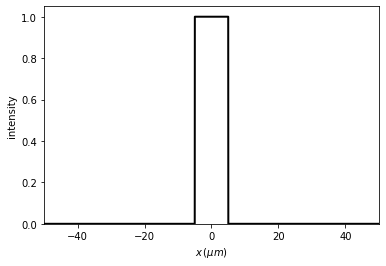

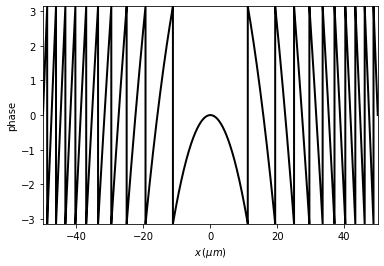

In [50]:
x = np.linspace(-100 * um, 100 * um, 4096)
wavelength = .5 * um

focal=.25*mm

u0 = Scalar_source_X(x=x0, wavelength=wavelength, info='u0')
u0.plane_wave(A=1, theta=0*degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=10 * um)
t0.draw()

t1 = Scalar_mask_X(x=x0, wavelength=wavelength, info='t0')
t1.lens(x0=0, radius=500, focal=focal, mask=False)
t1.draw(kind='phase')

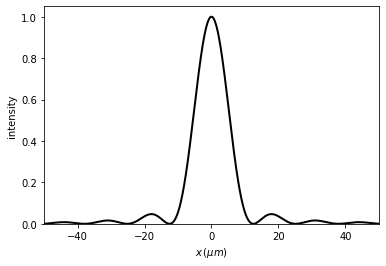

In [51]:
u1=t0*t1*u0

t2=u1.RS(z=focal, verbose=False)
t2.normalize()
t2.draw(kind='intensity')

## XY Scheme

In [53]:
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

In [66]:
x0 = np.linspace(-150 * um, 150 * um, 1024)
y0 = np.linspace(-150 * um, 150 * um, 1024)
wavelength = .5 * um

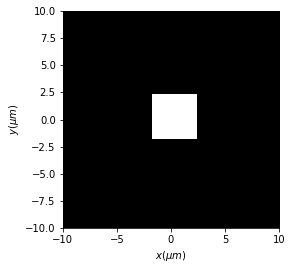

In [73]:
# plane wave
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0)

# slit
t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.square(r0=(0,0), size=(4*um, 4*um), angle=0)
t0.draw()
plt.xlim(-10,10)
plt.ylim(-10,10)

u1 = u0 * t0

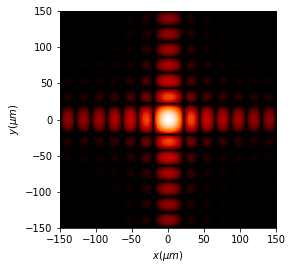

In [74]:
u2=u1.fft(remove0=False, new_field=True)
u2.draw(logarithm=1e-1);